In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
os.getcwd()

'/home/karthic25/Desktop/Programming/isl-py'

In [3]:
DATA_DIR = '/home/karthic25/Desktop/Programming/data/ISLR-master/data/csv'
data = pd.read_csv(f'{DATA_DIR}/Wage.csv', index_col='Unnamed: 0')
data

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


/tmp/ipykernel_104669/1489565313.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = data[data['maritl'] == '2. Married'][data['education'] == '4. College Grad'][data['jobclass'] == '2. Information']


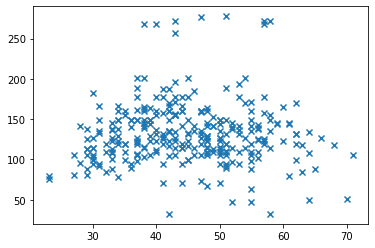

In [19]:
_ = data[data['maritl'] == '2. Married'][data['education'] == '4. College Grad'][data['jobclass'] == '2. Information']
plt.scatter(_['age'], _['wage'], marker='x')


/tmp/ipykernel_104669/2256860312.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = data[data['age'] > 42][data['age'] < 45][data['maritl'] == '2. Married'][data['jobclass'] == '2. Information']


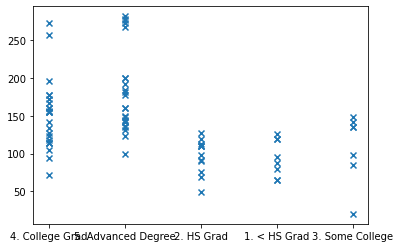

In [27]:
_ = data[data['age'] > 42][data['age'] < 45][data['maritl'] == '2. Married'][data['jobclass'] == '2. Information']
plt.scatter(_['education'], _['wage'], marker='x')

In [28]:
def get_race_vs_ft(data, ft='year'):
    race_v_ft = {}
    for race in data['race'].unique():
        race_v_ft[race] = data[data['race'] == race][ft].mean()
    print(pd.Series(race_v_ft))

ft = 'year'
get_race_vs_ft(data[data['wage'] > 250], ft=ft)

1. White    2005.897059
2. Black    2007.000000
3. Asian    2005.166667
dtype: float64


In [29]:
ft = 'age'
get_race_vs_ft(data[data['wage'] > 250], ft=ft)

1. White    46.926471
2. Black    47.800000
3. Asian    43.833333
dtype: float64


/tmp/ipykernel_104669/908101887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['wage'] > 250][data['race'] == '2. Black']['wage'].hist()


<AxesSubplot:>

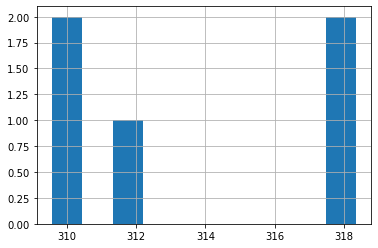

In [30]:
data[data['wage'] > 250][data['race'] == '2. Black']['wage'].hist()

/tmp/ipykernel_104669/1396771265.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['wage'] > 250][data['race'] == '1. White']['wage'].hist()


<AxesSubplot:>

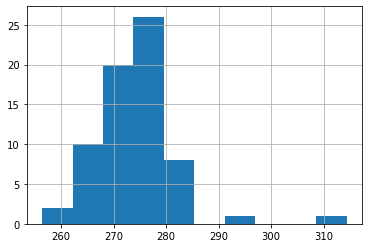

In [31]:
data[data['wage'] > 250][data['race'] == '1. White']['wage'].hist()

In [32]:
data

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [33]:
data['maritl'].unique()

array(['1. Never Married', '2. Married', '4. Divorced', '3. Widowed',
       '5. Separated'], dtype=object)

In [34]:
def get_categ_vs_contin(data, categ='race', contin='wage'):
    categ_vs_contin = {}
    for categ_val in data[categ].unique():
        categ_vs_contin[categ_val] = data[data[categ] == categ_val][contin].mean()
    ser = pd.Series(categ_vs_contin)
    ser.name = f'{categ} vs {contin}'
    print(ser, '\n')

get_categ_vs_contin(data, categ='race', contin='wage')

1. White    112.563666
3. Asian    120.288288
4. Other     89.973326
2. Black    101.601177
Name: race vs wage, dtype: float64 



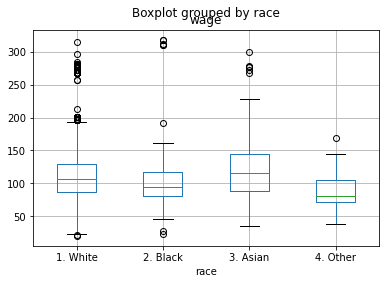

In [35]:
def boxplot_categ_vs_contin(data, categ='race', contin='wage'):
    data.boxplot(column=contin, by=categ)
    plt.show()

boxplot_categ_vs_contin(data, categ='race', contin='wage')

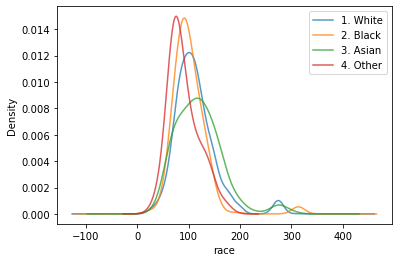

In [36]:
def kde_plot_categ_vs_contin(data, categ='race', contin='wage'):
    for categ_val in sorted(data[categ].unique()):
        data[data[categ] == categ_val][contin].plot.kde(label=categ_val, alpha=0.75)
    plt.legend()
    plt.xlabel(categ)
    plt.show()

kde_plot_categ_vs_contin(data, categ='race', contin='wage')

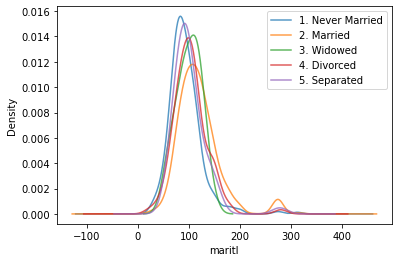

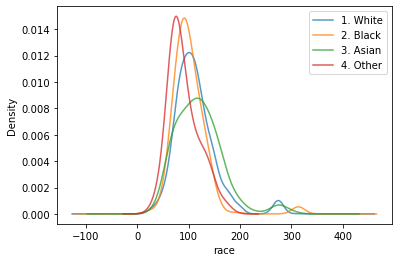

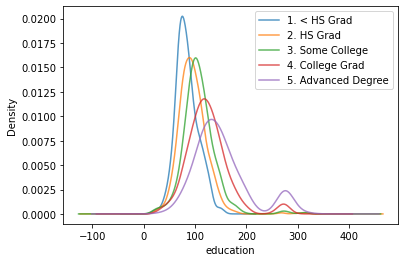

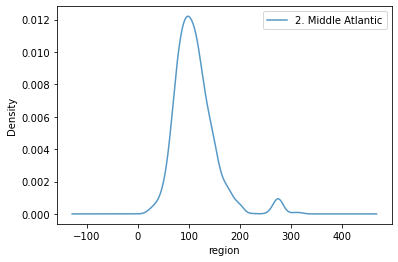

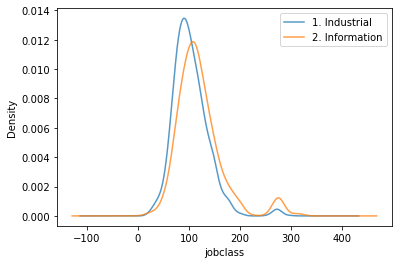

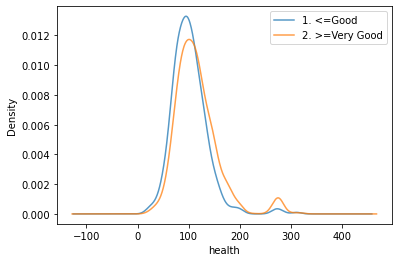

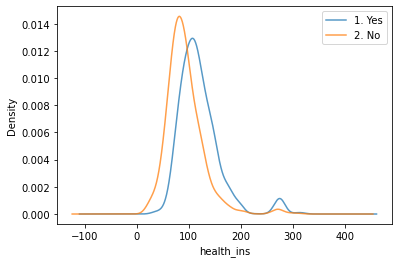

In [37]:
def all_categ_vs_label(data, f, label='wage'):
    categs = [c for c in data.columns if data[c].dtype == object]
    rets = []
    for categ in categs:
        rets.append(f(data, categ=categ, contin=label))
    if any(ret is not None for ret in rets):
        return pd.concat(rets, axis=1, keys=categs)
    
all_categ_vs_label(data, kde_plot_categ_vs_contin, label='wage')

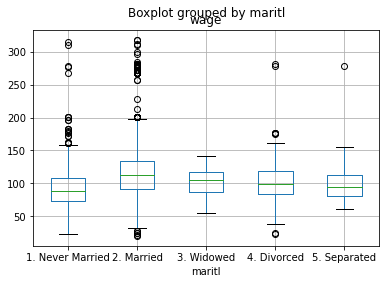

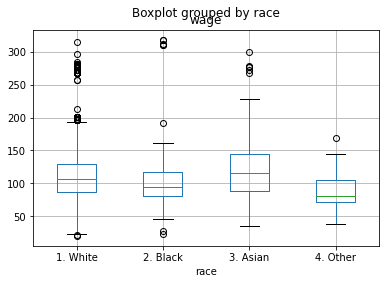

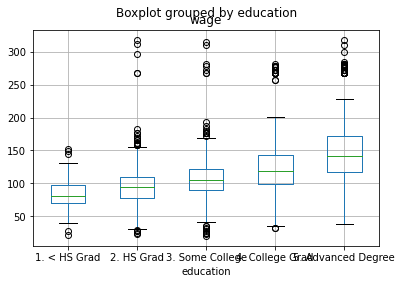

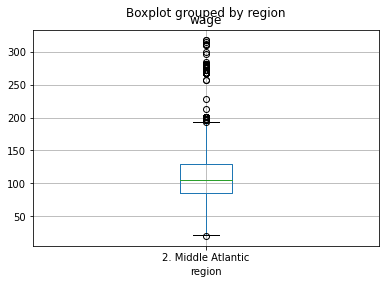

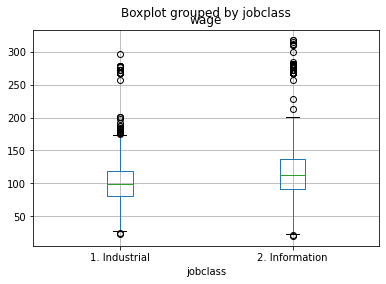

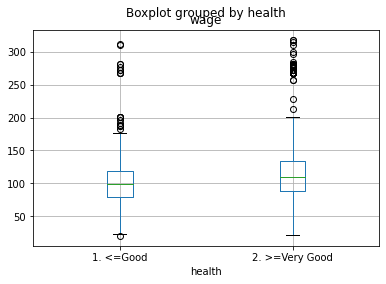

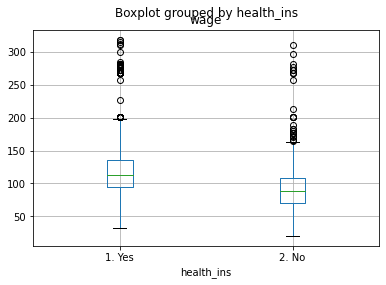

In [38]:
all_categ_vs_label(data, boxplot_categ_vs_contin, label='wage')

In [39]:
all_categ_vs_label(data, get_categ_vs_contin, label='wage')

1. Never Married     92.734649
2. Married          118.860261
4. Divorced         103.159261
3. Widowed           99.538655
5. Separated        101.215787
Name: maritl vs wage, dtype: float64 

1. White    112.563666
3. Asian    120.288288
4. Other     89.973326
2. Black    101.601177
Name: race vs wage, dtype: float64 

1. < HS Grad           84.104415
4. College Grad       124.427908
3. Some College       107.755566
2. HS Grad             95.783351
5. Advanced Degree    150.917776
Name: education vs wage, dtype: float64 

2. Middle Atlantic    111.703608
Name: region vs wage, dtype: float64 

1. Industrial     103.321129
2. Information    120.592721
Name: jobclass vs wage, dtype: float64 

1. <=Good         101.661285
2. >=Very Good    115.726164
Name: health vs wage, dtype: float64 

2. No      92.316703
1. Yes    120.238314
Name: health_ins vs wage, dtype: float64 



In [40]:
for c in data.columns:
    print(data[c].dtype, c)

int64 year
int64 age
object maritl
object race
object education
object region
object jobclass
object health
object health_ins
float64 logwage
float64 wage


In [111]:
from sklearn import preprocessing
lbs = []
categs = [c for c in data.columns if data[c].dtype == object]

data_new = data.copy()
for categ in categs:
    lb = preprocessing.LabelBinarizer()
    bin_fts = lb.fit_transform(data[categ])
    bin_fts = pd.DataFrame(bin_fts, index=data.index)
    
    bin_fts.columns = lb.inverse_transform(np.identity(bin_fts.shape[1]))

    data_new = data_new.drop(categ, axis=1)
    for c in bin_fts.columns:
        c_new = c.split('. ')[1]
        data_new[f'{categ}_{c_new}'] = bin_fts[c]
    lbs.append(lb)
data_new

,year,age,logwage,wage,maritl_Never Married,maritl_Married,maritl_Widowed,maritl_Divorced,maritl_Separated,race_White,...,race_Other,education_< HS Grad,education_HS Grad,education_Some College,education_College Grad,education_Advanced Degree,region_Middle Atlantic,jobclass_Information,health_>=Very Good,health_ins_No
231655,2006,18,4.318063,75.043154,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
86582,2004,24,4.255273,70.476020,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,1
161300,2003,45,4.875061,130.982177,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
155159,2003,43,5.041393,154.685293,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
11443,2005,50,4.318063,75.043154,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,5.041393,154.685293,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
302281,2007,30,4.602060,99.689464,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
10033,2005,27,4.193125,66.229408,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
14375,2005,27,4.477121,87.981033,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [276]:
X, y = data_new[[c for c in data_new.columns if c not in ('wage', 'logwage')]], data_new['wage']
X

,year,age,maritl_Never Married,maritl_Married,maritl_Widowed,maritl_Divorced,maritl_Separated,race_White,race_Black,race_Asian,race_Other,education_< HS Grad,education_HS Grad,education_Some College,education_College Grad,education_Advanced Degree,region_Middle Atlantic,jobclass_Information,health_>=Very Good,health_ins_No
231655,2006,18,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
86582,2004,24,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1
161300,2003,45,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
155159,2003,43,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
11443,2005,50,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
302281,2007,30,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
10033,2005,27,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
14375,2005,27,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

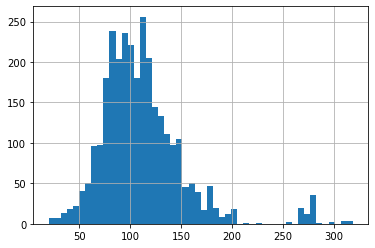

In [277]:
y.hist(bins=50)

In [295]:
def stratify(y):
    ranges = [0, 75, 100, 150, 250, 350]
    strat_y = {}
    for i in y.index:
        count = 0
        for j in range(len(ranges)-1):
            if y[i] >= ranges[j] and y[i] < ranges[j+1]:
                strat_y[i] = count
            count += 1
    return pd.Series(strat_y)

pd.concat([stratify(y), y], axis=1)

,0,wage
231655,1,75.043154
86582,0,70.476020
161300,2,130.982177
155159,3,154.685293
11443,1,75.043154
...,...,...
376816,3,154.685293
302281,1,99.689464
10033,0,66.229408
14375,1,87.981033


<AxesSubplot:>

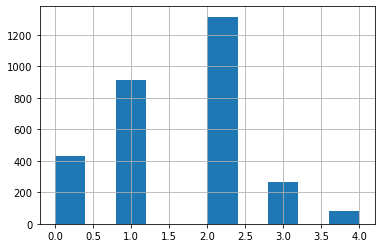

In [296]:
stratify(y).hist()

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=stratify(y))

# pf = PolynomialFeatures(degree=3, interaction_only=False)
# X_train, X_test = pf.fit_transform(X_train), pf.transform(X_test)

ss = StandardScaler()
X_train, X_test = ss.fit_transform(X_train), ss.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 20), (600, 20), (2400,), (600,))

In [282]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 15],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500]
}
param_grid = {
    'alpha': [0, 1, 1.5, 10, 50, 100, 200]
}
regr = Ridge()
gs = GridSearchCV(regr, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
gs.fit(X_train, y_train)
gs.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Ridge(alpha=50)

In [283]:
def get_poly_vars(n=10, deg=2):
    poly_vars = [1]
    
    for i in range(1, n+1):
        poly_vars.append(f'{X.columns[i-1]}')

    deg -= 1
    if not deg: return poly_vars
    for i in range(1, n+1):
        for j in range(i, n+1):
            poly_vars.append(f'{X.columns[i-1]}*{X.columns[j-1]}')
    
    deg -= 1
    if not deg: return poly_vars
    for i in range(1, n+1):
        for j in range(i, n+1):
            for k in range(j, n+1):
                poly_vars.append(f'{X.columns[i-1]}*{X.columns[j-1]}*{X.columns[k-1]}')
    
    return poly_vars

# coefs = pd.Series(gs.best_estimator_.coef_, index=get_poly_vars(n=20, deg=3))
coefs = pd.Series(gs.best_estimator_.coef_, index=X.columns)
coefs.sort_values(ascending=False, key=abs)[:20]

education_Advanced Degree    11.104838
health_ins_No                -8.081535
education_< HS Grad          -6.559030
education_HS Grad            -6.221618
maritl_Married                3.680576
age                           3.636796
education_College Grad        3.622321
maritl_Never Married         -3.518711
health_>=Very Good            3.208357
year                          2.776469
education_Some College       -1.426238
jobclass_Information          1.268435
maritl_Divorced              -1.164809
maritl_Widowed               -0.777772
race_Other                   -0.745711
race_White                    0.686425
maritl_Separated              0.650935
race_Black                   -0.489046
race_Asian                   -0.119609
region_Middle Atlantic        0.000000
dtype: float64

In [284]:
from sklearn.metrics import r2_score, max_error, \
    explained_variance_score, mean_absolute_error, \
    mean_squared_error, mean_absolute_percentage_error
from math import sqrt

def _get_results(y_true, y_pred):
    results = {
        'r2_score': r2_score(y_true, y_pred),
        'max_error': max_error(y_true, y_pred),
        'explained_variance_score': explained_variance_score(y_true, y_pred),
        'mean_absolute_error': mean_absolute_error(y_true, y_pred),
        'sqrt_mean_squared_error': sqrt(mean_squared_error(y_true, y_pred)),
        'mean_absolute_percentage_error': mean_absolute_percentage_error(y_true, y_pred)
    }
    return pd.Series(results)

def get_results(gs, X_train, X_test, y_train, y_test):
    y_train_pred = gs.predict(X_train)
    y_test_pred = gs.predict(X_test)
    return pd.concat([
        _get_results(y_test, y_test_pred), 
        _get_results(y_train, y_train_pred)
    ], axis=1, keys=['Test Results', 'Train Results']), y_train_pred, y_test_pred

results, y_train_pred, y_test_pred = get_results(gs, X_train, X_test, y_train, y_test)
results

,Test Results,Train Results
r2_score,0.324640,0.342201
max_error,173.748519,213.526289
explained_variance_score,0.324641,0.342201
mean_absolute_error,23.571771,22.883579
sqrt_mean_squared_error,34.349124,33.822889
mean_absolute_percentage_error,0.230265,0.224025


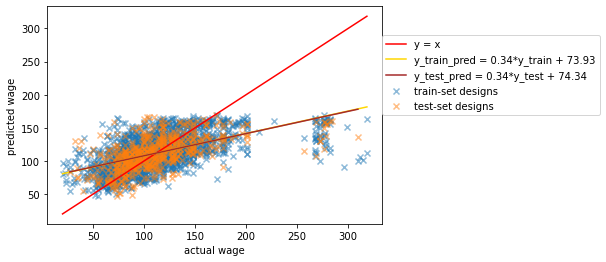

In [285]:
def plot_train_test(y_test, y_test_pred, y_train, y_train_pred, label='wage'):
    plt.scatter(y_train, y_train_pred, marker='x', label='train-set designs', alpha=0.5)
    plt.scatter(y_test, y_test_pred, marker='x', label='test-set designs', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='red', label='y = x')
    
    best_fit = LinearRegression()
    best_fit.fit(pd.DataFrame(y_train), y_train_pred)
    m, c = best_fit.coef_[0], best_fit.intercept_
    plt.plot([y_train.min(), y_train.max()], [m*y_train.min()+c, m*y_train.max()+c], c='gold', label=f'y_train_pred = {round(m, 2)}*y_train + {round(c, 2)}')

    best_fit.fit(pd.DataFrame(y_test), y_test_pred)
    m, c = best_fit.coef_[0], best_fit.intercept_
    plt.plot([y_test.min(), y_test.max()], [m*y_test.min()+c, m*y_test.max()+c], c='brown', label=f'y_test_pred = {round(m, 2)}*y_test + {round(c, 2)}')

    plt.xlabel('actual ' + label)
    plt.ylabel('predicted ' + label)
    plt.legend(loc=(1,.5))
    plt.show()

plot_train_test(y_test, y_test_pred, y_train, y_train_pred, label='wage')

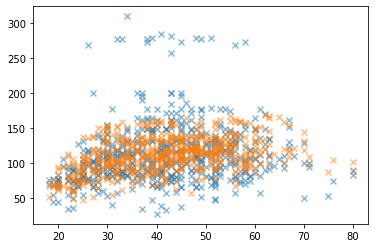

In [286]:
def plot_cont_var_vs_label(y_test, y_test_pred, y_train, y_train_pred, X, contin='age', label='wage'):
    plt.scatter(X[contin].loc[y_test.index], y_test, marker='x', alpha=0.5)
    plt.scatter(X[contin].loc[y_test.index], y_test_pred, marker='x', alpha=0.5)

plot_cont_var_vs_label(y_test, y_test_pred, y_train, y_train_pred, X, contin='age', label='wage')

In [287]:
cv_results = pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
cv_results['sqrt_mean_squared_error_test'] = (-cv_results['mean_test_score']).apply(sqrt)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,sqrt_mean_squared_error_test
4,0.002731,0.000349,0.000910,0.000041,50,{'alpha': 50},-1087.418177,-1100.404743,-1076.786947,-1246.978526,-1304.489844,-1163.215647,93.952121,1,34.105947
5,0.002978,0.000118,0.001035,0.000034,100,{'alpha': 100},-1086.555605,-1099.720779,-1075.951488,-1248.462272,-1305.518791,-1163.241787,94.911077,2,34.106331
3,0.003217,0.001136,0.000857,0.000053,10,{'alpha': 10},-1088.461129,-1101.260819,-1077.717308,-1245.988127,-1303.764107,-1163.438298,93.103716,3,34.109211
2,0.003025,0.000674,0.000832,0.000097,1.5,{'alpha': 1.5},-1088.726834,-1101.481377,-1077.947723,-1245.802578,-1303.622025,-1163.516107,92.913318,4,34.110352
1,0.002778,0.000061,0.000894,0.000075,1,{'alpha': 1},-1088.742966,-1101.494792,-1077.961650,-1245.791949,-1303.613806,-1163.521033,92.902003,5,34.110424
6,0.002763,0.000314,0.000894,0.000154,200,{'alpha': 200},-1086.080387,-1099.444076,-1075.209618,-1252.107256,-1307.923727,-1164.153013,96.539604,6,34.119687
0,0.035198,0.017441,0.001190,0.000393,0,{'alpha': 0},-1090.670651,-1150.749824,-1158.982226,-1277.663282,-1336.894554,-1202.992107,90.319306,7,34.684177


In [288]:
from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = {}, {}, {}
alphas = [0, 0.1, 0.25, 0.5, 1, 1.1, 1.25, 1.5, 2.5, 5, 10, 25, 50, 100, 250, 500]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse[alpha], bias[alpha], var[alpha] = bias_variance_decomp(model, X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=200, random_seed=1)
mse, bias, var = pd.Series(mse), pd.Series(bias), pd.Series(var)

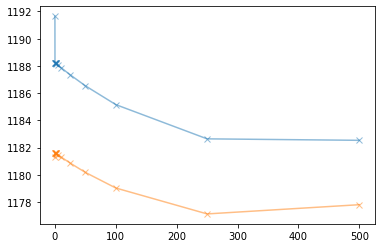

In [289]:
from scipy.interpolate import interp1d

plt.plot(mse.index, mse.values, marker='x', alpha=0.5, label='MSE')
plt.plot(bias.index, bias.values, marker='x', alpha=0.5, label='Bias')

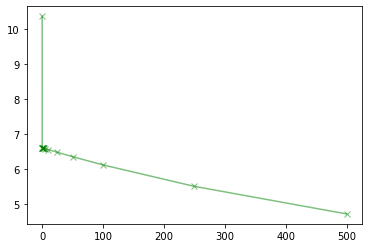

In [290]:
plt.plot(var.index, var.values, marker='x', alpha=0.5, label='Var', c='green')

In [291]:
def get_ft_imp(gs, fts):
    return pd.Series(gs.best_estimator_.feature_importances_, index=fts).sort_values(ascending=False)

# get_ft_imp(gs, get_poly_vars(n=20))[:30]

In [292]:
data_new.sum().sort_values().round(2)

region_Middle Atlantic             0.00
maritl_Widowed                    19.00
race_Other                        37.00
maritl_Separated                  55.00
race_Asian                       190.00
maritl_Divorced                  204.00
education_< HS Grad              268.00
race_Black                       293.00
education_Advanced Degree        426.00
maritl_Never Married             648.00
education_Some College           650.00
education_College Grad           685.00
health_ins_No                    917.00
education_HS Grad                971.00
jobclass_Information            1456.00
maritl_Married                  2074.00
health_>=Very Good              2142.00
race_White                      2480.00
logwage                        13961.72
age                           127244.00
wage                          335110.82
year                         6017373.00
dtype: float64

<AxesSubplot:>

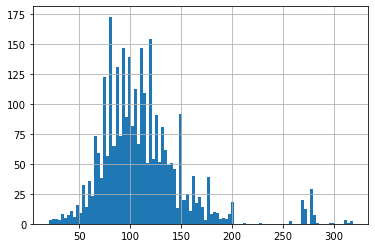

In [235]:
data_new['wage'].hist(bins=100)

In [239]:
data[data['wage'] > 300].sort_values(by='wage')

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
230814,2006,34,1. Never Married,2. Black,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.735190,309.571771
233833,2006,58,2. Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,2. No,5.735190,309.571771
451283,2009,38,2. Married,2. Black,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,5.742793,311.934569
154582,2003,38,1. Never Married,1. White,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.750441,314.329336
307024,2007,63,2. Married,2. Black,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.763128,318.342430
302206,2007,46,2. Married,2. Black,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.763128,318.342430


In [241]:
data[data['wage'] > 250]['jobclass'].value_counts()

2. Information    61
1. Industrial     18
Name: jobclass, dtype: int64

In [242]:
data[data['wage'] > 250]['health'].value_counts()

2. >=Very Good    69
1. <=Good         10
Name: health, dtype: int64

In [275]:
data[data['wage'] > 270].sort_values(by='wage')

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
83739,2004,42,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,5.606885,272.294783
80235,2004,43,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.606885,272.294783
82464,2004,58,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.606885,272.294783
80604,2004,57,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.606885,272.294783
84219,2004,45,2. Married,3. Asian,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.606885,272.294783
81085,2004,45,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.606885,272.294783
81696,2004,47,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,5.606885,272.294783
85580,2004,54,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,5.606885,272.294783
84595,2004,43,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.606885,272.294783
84630,2004,43,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.606885,272.294783
